# Social Environmental factors affecting Life Expectancy in Counties in the USA

In [83]:
#importing all necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from scipy import stats
plt.style.use('ggplot')
from itertools import combinations, product
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_excel('2019 County Health Rankings Data - v2.xls',3,header=1)

In [3]:
#after looking at the excel file I chose to extract these features as they are the most sutiable ones to help predict life expectancy in each county.
df = df[['State', 'County',
           'Violent Crime Rate',
           'Years of Potential Life Lost Rate',
           '% Fair/Poor',
           'Physically Unhealthy Days',
           'Mentally Unhealthy Days',
           '% LBW',
           '% Smokers',
           '% Obese',
           'Food Environment Index',
           '% Physically Inactive',
           '% With Access',
           '% Excessive Drinking',
           '% Alcohol-Impaired', 
           'Chlamydia Rate',
           'Teen Birth Rate',
           '% Uninsured',
           'PCP Rate',
           'Dentist Rate',
           'MHP Rate',
           'Preventable Hosp. Rate',
           '% Screened',
           '% Vaccinated',
           'Graduation Rate',
           '% Some College',
           '% Unemployed',
           '% Children in Poverty',
           'Income Ratio',
           '% Single-Parent Households',
           'Association Rate',
           'Injury Death Rate',
           'Average Daily PM2.5',
           'Presence of violation',
           '% Severe Housing Problems',
           '% Drive Alone',
           '% Long Commute - Drives Alone'
          ]]

# EDA and Cleaning

In [4]:
#substituting spaces for '_' for easier manipulations
subs = [(' ', '_'),('.',''),("'",""),('™', ''), 
        ('®',''),('+','plus'), ('½','half'), ('-','_')]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Violent_Crime_Rate,2951.0,251.909300,192.512209,0.000000,117.635602,204.558847,334.927059,1819.514406
Years_of_Potential_Life_Lost_Rate,2908.0,8522.746578,2636.060709,2900.417484,6697.363078,8164.672369,10045.192113,29782.937533
%_Fair/Poor,3142.0,17.483261,4.699417,8.289167,13.942012,16.691579,20.476458,40.732355
Physically_Unhealthy_Days,3142.0,3.922021,0.714456,2.323511,3.393395,3.870800,4.417652,7.230990
Mentally_Unhealthy_Days,3142.0,3.932145,0.613682,2.439654,3.494451,3.937506,4.348074,5.964156
%_LBW,3035.0,8.113269,2.049521,2.645503,6.744960,7.789934,9.091356,26.136364
%_Smokers,3142.0,17.872612,3.660079,6.735433,15.235070,17.320893,20.280274,42.754056
%_Obese,3142.0,32.071547,4.589006,13.600000,29.300000,32.300000,35.100000,49.500000
Food_Environment_Index,3123.0,7.465738,1.165679,0.000000,6.900000,7.700000,8.200000,10.000000
%_Physically_Inactive,3142.0,25.699968,5.173400,8.400000,22.300000,25.700000,29.200000,45.100000


In [6]:
df.isna().sum()

State                                  0
County                                 0
Violent_Crime_Rate                   191
Years_of_Potential_Life_Lost_Rate    234
%_Fair/Poor                            0
Physically_Unhealthy_Days              0
Mentally_Unhealthy_Days                0
%_LBW                                107
%_Smokers                              0
%_Obese                                0
Food_Environment_Index                19
%_Physically_Inactive                  0
%_With_Access                          6
%_Excessive_Drinking                   0
%_Alcohol_Impaired                    33
Chlamydia_Rate                       158
Teen_Birth_Rate                      144
%_Uninsured                            1
PCP_Rate                             135
Dentist_Rate                          85
MHP_Rate                             252
Preventable_Hosp_Rate                 38
%_Screened                            19
%_Vaccinated                          16
Graduation_Rate 

In [7]:
#cleaning Null values
df.dropna(how='any', inplace=True)
df.isna().sum()
#changing categorical data of Yes/No into binary 1/0.
df.Presence_of_violation = df.Presence_of_violation.map(lambda x: 1 if x=='Yes' else 0)
df.head()

,State,County,Violent_Crime_Rate,Years_of_Potential_Life_Lost_Rate,%_Fair/Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,%_LBW,%_Smokers,%_Obese,...,%_Children_in_Poverty,Income_Ratio,%_Single_Parent_Households,Association_Rate,Injury_Death_Rate,Average_Daily_PM25,Presence_of_violation,%_Severe_Housing_Problems,%_Drive_Alone,%_Long_Commute___Drives_Alone
0,Alabama,Autauga,272.282220,8824.057123,18.411124,4.200578,4.306739,8.475719,19.124658,37.5,...,19.3,4.636664,24.700097,12.631731,74.031808,11.7,0,14.954646,85.965057,38.3
1,Alabama,Baldwin,203.660396,7224.632160,18.060458,4.098748,4.249649,8.338683,16.795485,31.0,...,14.7,4.518560,25.184091,10.692213,69.374289,10.3,1,13.831725,84.719423,40.5
2,Alabama,Barbour,414.277861,9586.165037,25.773416,5.067438,4.634994,10.952624,21.540878,44.3,...,50.3,5.755063,57.215743,8.472944,72.900134,11.5,0,15.455531,83.404353,33.8
3,Alabama,Bibb,89.349126,11783.543675,19.996912,4.363377,4.315710,11.105003,19.916404,37.8,...,27.3,4.254594,29.565404,10.157665,100.077937,11.2,0,10.960854,86.365902,48.6
4,Alabama,Blount,482.690611,10908.101822,21.095323,4.512753,4.701599,7.926829,19.652158,34.4,...,18.5,4.126883,29.569733,9.011507,105.197227,11.7,0,10.401153,86.792275,59.7


In [69]:
# Label Encoder for State and County
le = LabelEncoder()

for f in df.columns:
    if df[f].dtype == np.dtype('O'):
        df[f] = le.fit_transform(df[f])

# Base Model
when building our model in order to predict life expectancy I will be focusing on Linear Regression in this project and will aim to improve and optimize my model.
#### further improving our model by checking
* Multicolineiarity 
* interactions, Normality, Homoscedasticity after you make your model (as it deals with the residuals)
* remove p-values that are high to make our model better

In [76]:
# we are trying to predict the life expectancy by certain features in each state/county so we will remove those column features
X=df.drop(columns=['State','County','Years_of_Potential_Life_Lost_Rate'])
y=df['Years_of_Potential_Life_Lost_Rate']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [78]:
#we are dealing with 34 different features
len(X_train.columns)

34

In [89]:
#Basic Fit for out base model
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mse_baseline = np.sqrt(mean_squared_error(y_test, preds))
print(mse_baseline)
baseline = np.mean(cross_val_score(lr,X_train, y_train, cv=5))
baseline

855.1872237508694


0.8426803224092986

For a base model 84.5% is quite good, but as we will see when doing Linear Regression their are certain Assumptions we must account for, these must be taken into consideration because when assumptions are broken we stop being able to draw accurate conclusions from our data. 

In [90]:
# Trying PolynomialFeatures as well to see if there is a polynomial pattern that can be fit to the data
poly = PolynomialFeatures(3)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

lr.fit(X_train_poly, y_train)
preds_poly = lr.predict(X_test_poly)
mse_baseline_poly = np.sqrt(mean_squared_error(y_test, preds_poly))
print(mse_baseline_poly)
baseline_poly = np.mean(cross_val_score(lr,X_train_poly, y_train, cv=5))
baseline_poly


5009.54215245604


-12.430007763647371

In [94]:
#checking the degree of polynomial to use for the lowest mse result
for n in range(1, 5):
    poly = PolynomialFeatures(n)
    poly.fit(X_train)
    X_train_poly = poly.transform(X_train)
    X_test_poly = poly.transform(X_test)
    lr.fit(X_train_poly, y_train)
    preds_poly = lr.predict(X_test_poly)
    mse_baseline_poly = np.sqrt(mean_squared_error(y_test, preds_poly))
    print("Number of degrees of Polynomial", n, ':', mse_baseline_poly)

Number of degrees of Polynomial 1 : 855.1872237508647
Number of degrees of Polynomial 2 : 1052.258467302069
Number of degrees of Polynomial 3 : 5009.54215245604
Number of degrees of Polynomial 4 : 10821.689464014296


In [ ]:
#Based on the above I can tell that adding a degree of polynomial will not improve the baseline

# Checking For Interactions

An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. This simply means that an feature variable can effect the outcome in a different way when the presence of another certain feature variables presence, compared to when that feature is not there. One of the assumptions of Linear regression is that those variables which have interaction should be minimized or removed.

In [52]:
scale=StandardScaler()
regression=LinearRegression()
interactions = []
data = X_train.copy()
crossvalidation=KFold(5)
combo= list(combinations(X_train.columns, 2))
for comb in combo:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score,3)))
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

Top 3 interactions: [('Teen_Birth_Rate', 'Injury_Death_Rate', 0.848), ('%_Unemployed', 'Association_Rate', 0.848), ('%_Fair/Poor', 'Injury_Death_Rate', 0.847)]


# Checking for Multicollinearity

multicollinearity refers to feature that are correlated with other features. In this case it is a given that when one increases the other will increase as well. As one of the Assumptions of Linear Regression, we must remove those features that have a high multicollinearity in order to interpret our coefficients accuratly

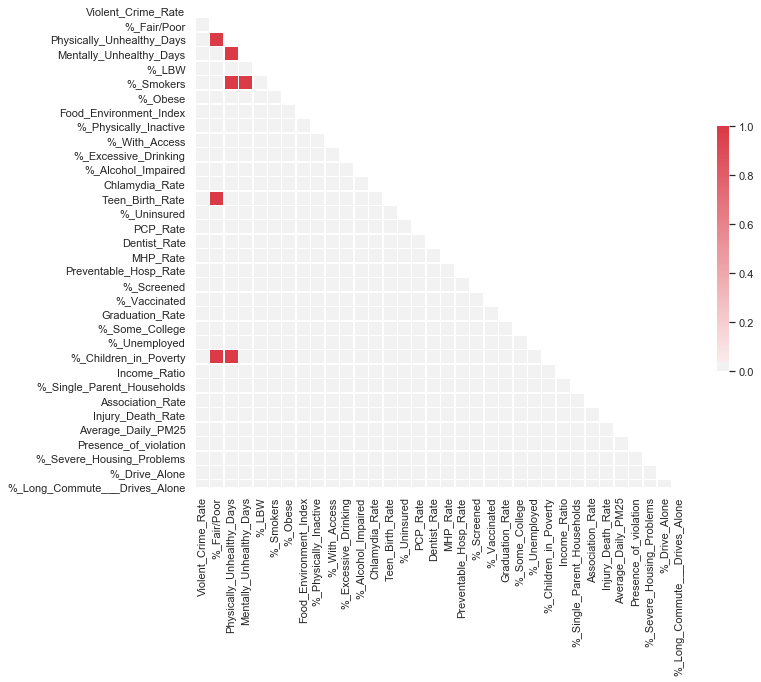

In [53]:
def print_corr(df, pct=0):
    sns.set(style='white')
    # Compute the correlation matrix
    if pct == 0:
        corr = df.corr()
    else:
        corr = abs(df.corr()) > pct
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})
print_corr(X,0.75)

We can see that the features which have multicollinearity greater then 0.75 which is the cut-off I chose are:
* %_Fair/Poor
* Physically_Unhealthy_Days
* Mentally_Unhealthy_Days
* %_Smokers
* %_Children_in_Poverty
<br><br>
The main culprits are three features: '%_Fair/Poor',  'Physically_Unhealthy_Days' and '%_Smokers'. We will remove these features in order to interpret our coefficients accuratly as mentioned above

In [54]:
# #removing from both our training and testing set
# 'Physically_Unhealthy_Days' feature removed previously due to p-value as well
X_train.drop(columns = ['%_Fair/Poor', 'Physically_Unhealthy_Days', '%_Smokers'],inplace=True)
X_test.drop(columns = ['%_Fair/Poor', 'Physically_Unhealthy_Days', '%_Smokers'], inplace=True)

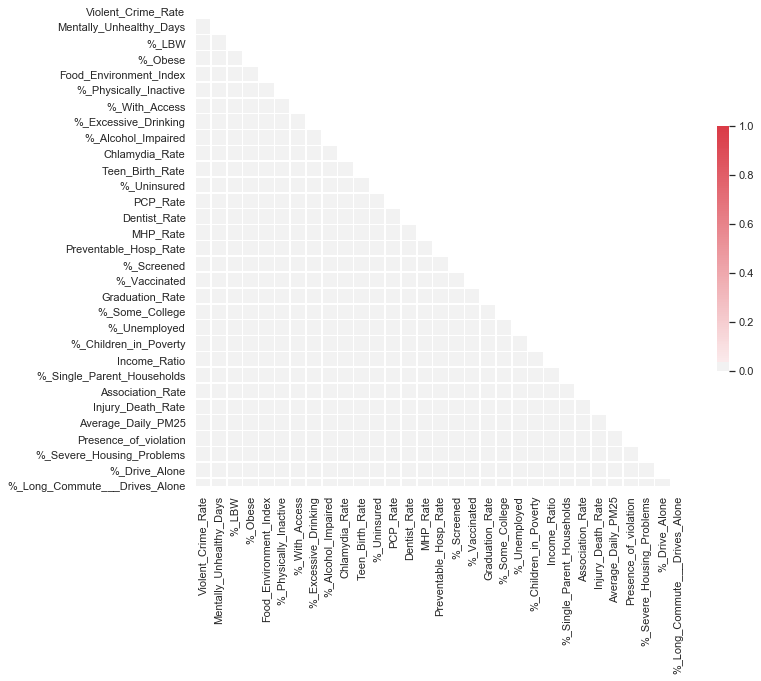

In [55]:
# No Multicollinearity after removing those 3 features
print_corr(X_train,0.75)

In [56]:
#do an OLS model summary on y_train and X_train to see how it changed from our base model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Years_of_Potential_Life_Lost_Rate   R-squared:                       0.854
Model:                                           OLS   Adj. R-squared:                  0.851
Method:                                Least Squares   F-statistic:                     249.6
Date:                               Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                                       16:41:16   Log-Likelihood:                -11132.
No. Observations:                               1350   AIC:                         2.233e+04
Df Residuals:                                   1318   BIC:                         2.250e+04
Df Model:                                         31                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -5199.1354   1009.869     -5.148      0.000   -7180.261   -3218.009
Violent_Crime_Rate                0.2110      0.172      1.225      0.221      -0.127       0.549
Mentally_Unhealthy_Days         327.1896     75.127      4.355      0.000     179.808     474.571
%_LBW                           117.7290     22.575      5.215      0.000      73.441     162.017
%_Obese                          19.2065      9.101      2.110      0.035       1.353      37.060
Food_Environment_Index         -120.0545     44.519     -2.697      0.007    -207.391     -32.718
%_Physically_Inactive            51.8183      9.249      5.602      0.000      33.673      69.963
%_With_Access                    -3.1982      1.743     -1.834      0.067      -6.618       0.222
%_Excessive_Drinking             -6.7204     12.524     -0.537      0.592     -31.289      17.848
%_Alcohol_Impaired                1.3393      2.279      0.588      0.557      -3.131       5.810
Chlamydia_Rate                    0.7936      0.184      4.325      0.000       0.434       1.154
Teen_Birth_Rate                  27.7221      3.549      7.811      0.000      20.759      34.685
%_Uninsured                      -0.4470      8.088     -0.055      0.956     -16.313      15.419
PCP_Rate                         -0.8903      1.122     -0.793      0.428      -3.092       1.311
Dentist_Rate                     -0.5645      1.579     -0.358      0.721      -3.661       2.532
MHP_Rate                          0.3064      0.212      1.447      0.148      -0.109       0.722
Preventable_Hosp_Rate             0.0376      0.019      1.961      0.050   -1.66e-05       0.075
%_Screened                       -8.5641      5.207     -1.645      0.100     -18.778       1.650
%_Vaccinated                      3.8257      3.894      0.983      0.326      -3.813      11.464
Graduation_Rate                  13.5602      4.428      3.062      0.002       4.874      22.247
%_Some_College                    6.6841      4.253      1.572      0.116      -1.659      15.027
%_Unemployed                     19.9853     23.075      0.866      0.387     -25.283      65.253
%_Children_in_Poverty            26.4245      8.127      3.252      0.001      10.482      42.367
Income_Ratio                    208.2438     55.021      3.785      0.000     100.306     316.182
%_Single_Parent_Households       10.3317      4.876      2.119      0.034       0.766      19.898
Association_Rate                  0.6763      6.298      0.107      0.915     -11.679      13.031
Injury_Death_Rate                47.1891      1.475     31.993      0.000   

our R2 value increased by around 0.7 after removing features with high multicollinearity

# Removing Variable with  p-values > 0.05

The p-value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct.
<br><br>
Now this shows us that if our P-value is greater then 0.05 then that means the alternative hypothesis(in this case we are saying that their is a realtionship between the features and life expectancy) is not statistically significant, and we retain the null hypothesis(their is no significant realtionship between the features and life expectancy) and reject the alternative hypothesis
<br><br>
We will remove those features which have a p-value greater than 0.05 as they are not statistically significant

In [57]:
model.pvalues[model.pvalues > 0.05]

Violent_Crime_Rate           0.220922
%_With_Access                0.066814
%_Excessive_Drinking         0.591624
%_Alcohol_Impaired           0.556801
%_Uninsured                  0.955937
PCP_Rate                     0.427752
Dentist_Rate                 0.720704
MHP_Rate                     0.148174
Preventable_Hosp_Rate        0.050101
%_Screened                   0.100246
%_Vaccinated                 0.326019
%_Some_College               0.116279
%_Unemployed                 0.386597
Association_Rate             0.914502
Presence_of_violation        0.227099
%_Severe_Housing_Problems    0.120370
dtype: float64

For most of these features it is to be expected, although at a first glance I would have expected '%_Excessive_Drinking' would have had a significant effect on life expectancy 

In [58]:
def remove_p(model, X_train, X_test):
    imp_feature = list(model.pvalues[model.pvalues < 0.05].index)[1:]
    X_train = X_train[imp_feature] 
    X_test = X_test[imp_feature]
    return X_train, X_test

In [59]:
X_train, X_test = remove_p(model, X_train, X_test)

In [60]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Years_of_Potential_Life_Lost_Rate   R-squared:                       0.852
Model:                                           OLS   Adj. R-squared:                  0.850
Method:                                Least Squares   F-statistic:                     511.8
Date:                               Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                                       16:41:16   Log-Likelihood:                -11144.
No. Observations:                               1350   AIC:                         2.232e+04
Df Residuals:                                   1334   BIC:                         2.240e+04
Df Model:                                         15                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -6066.6712    698.433     -8.686      0.000   -7436.818   -4696.525
Mentally_Unhealthy_Days         329.3567     64.940      5.072      0.000     201.960     456.753
%_LBW                           131.0358     21.300      6.152      0.000      89.251     172.820
%_Obese                          24.2223      8.468      2.860      0.004       7.609      40.835
Food_Environment_Index         -135.4064     41.592     -3.256      0.001    -217.000     -53.813
%_Physically_Inactive            57.4009      8.654      6.633      0.000      40.424      74.378
Chlamydia_Rate                    0.8015      0.168      4.777      0.000       0.472       1.131
Teen_Birth_Rate                  29.3287      2.897     10.125      0.000      23.646      35.011
Graduation_Rate                  14.6749      4.277      3.431      0.001       6.285      23.065
%_Children_in_Poverty            24.2607      7.111      3.412      0.001      10.310      38.211
Income_Ratio                    224.3101     51.113      4.388      0.000     124.039     324.581
%_Single_Parent_Households        8.3566      4.630      1.805      0.071      -0.726      17.439
Injury_Death_Rate                47.9518      1.383     34.681      0.000      45.239      50.664
Average_Daily_PM25               49.1086     18.103      2.713      0.007      13.594      84.623
%_Drive_Alone                    22.3854      5.501      4.069      0.000      11.594      33.177
%_Long_Commute___Drives_Alone     8.8773      2.419      3.671      0.000       4.133      13.622
==============================================================================
Omnibus:                      171.762   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.956
Skew:                           0.621   Prob(JB):                    4.21e-122
Kurtosis:                       5.897   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

our R2 has had a very small change but we have removed alot of features that may have been affecting the r2 

In [61]:
len(X_train.columns)

16

After pruning and removing certain features we are left with 16 variables. We have pruned and removed almost half of the features we started with

# Checking for Homoscedasticity


The Assumption of Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. What this means is that the variables should have a similar variance and not sudden jumps or drops in variance as the variable increases or decreases.

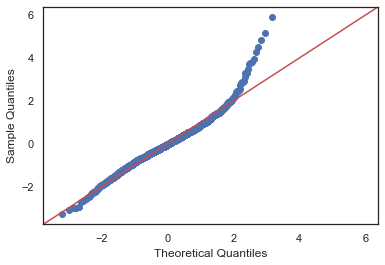

In [62]:
# model residual distributions
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

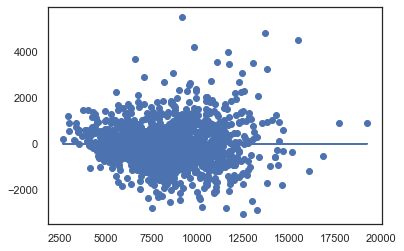

In [63]:
plt.scatter(model.predict(X_train), model.resid)
plt.plot(model.predict(X_train), [0 for i in range(len(X_train))])

In [64]:
#removing outliers
for i in range(90,99):
    q = i/100
    print('Percentile {}: {}'.format(q, y_train.quantile(q=q)))

Percentile 0.9: 11351.7678371
Percentile 0.91: 11603.898244060007
Percentile 0.92: 11808.03295792
Percentile 0.93: 11991.890074760002
Percentile 0.94: 12222.592820399997
Percentile 0.95: 12475.46843505
Percentile 0.96: 12967.27373444
Percentile 0.97: 13595.29942951
Percentile 0.98: 14167.17586772


In [65]:
#removing outliers
for i in range(0,9):
    q = i/100
    print('Percentile {}: {}'.format(q, y_train.quantile(q=q)))

Percentile 0.0: 2900.417484
Percentile 0.01: 4050.677566911
Percentile 0.02: 4264.413732248
Percentile 0.03: 4475.831856224
Percentile 0.04: 4644.7585366759995
Percentile 0.05: 4877.924362415
Percentile 0.06: 5026.6337528839995
Percentile 0.07: 5185.165672872001
Percentile 0.08: 5341.356764956


we will remove from those that are below 1% and those above 96% since there is a big jump between our values

In [66]:
drop_upper_index = y_train[(y_train > y_train.quantile(q=0.95))].index
drop_lower_index = y_train[(y_train < y_train.quantile(q=0.01))].index

len(drop_lower_index)
#drop upper and lower quartile values
y_train = y_train.drop(index=drop_upper_index)
y_train = y_train.drop(index=drop_lower_index)

X_train = X_train.drop(index=drop_upper_index)
X_train = X_train.drop(index=drop_lower_index)

print(len(X_train))
print(len(y_train))

1268
1268


#### Rerun Model with dropped p-values and dropped outlier

In [67]:
model2= sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Years_of_Potential_Life_Lost_Rate   R-squared:                       0.826
Model:                                           OLS   Adj. R-squared:                  0.824
Method:                                Least Squares   F-statistic:                     396.7
Date:                               Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                                       16:41:17   Log-Likelihood:                -10311.
No. Observations:                               1268   AIC:                         2.065e+04
Df Residuals:                                   1252   BIC:                         2.074e+04
Df Model:                                         15                                         
Covariance Type:                           nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -4935.3667    671.866     -7.346      0.000   -6253.474   -3617.260
Mentally_Unhealthy_Days         374.5326     59.648      6.279      0.000     257.511     491.554
%_LBW                           152.4977     20.422      7.467      0.000     112.433     192.562
%_Obese                          18.3944      7.853      2.342      0.019       2.988      33.801
Food_Environment_Index         -141.9634     39.438     -3.600      0.000    -219.336     -64.591
%_Physically_Inactive            57.9513      7.881      7.354      0.000      42.491      73.412
Chlamydia_Rate                    0.2750      0.173      1.593      0.111      -0.064       0.614
Teen_Birth_Rate                  25.5297      2.710      9.419      0.000      20.212      30.847
Graduation_Rate                  11.8331      4.032      2.935      0.003       3.923      19.743
%_Children_in_Poverty            21.1609      6.721      3.149      0.002       7.976      34.346
Income_Ratio                    145.1140     49.442      2.935      0.003      48.115     242.113
%_Single_Parent_Households       11.5230      4.347      2.651      0.008       2.994      20.052
Injury_Death_Rate                42.2088      1.383     30.509      0.000      39.495      44.923
Average_Daily_PM25               62.0817     16.476      3.768      0.000      29.758      94.405
%_Drive_Alone                    22.2513      5.135      4.333      0.000      12.177      32.326
%_Long_Commute___Drives_Alone     5.8259      2.232      2.610      0.009       1.447      10.205
==============================================================================
Omnibus:                       28.902   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.914
Skew:                           0.148   Prob(JB):                     5.33e-12
Kurtosis:                       3.946   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rechecking Normality and Homoscedasticity

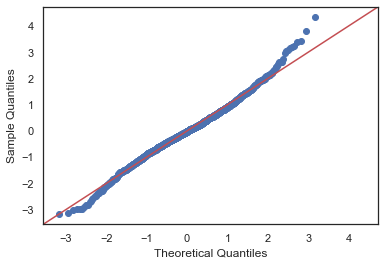

In [68]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

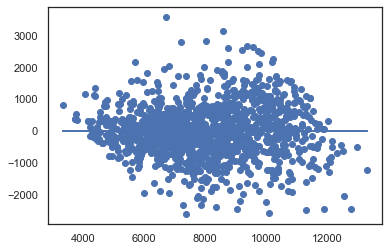

In [69]:
plt.scatter(model2.predict(X_train), model2.resid)
plt.plot(model2.predict(X_train), [0 for i in range(len(X_train))])

The Models residuals look alot better now that we have removed outliers

## Scaling Predictors to compare with Ridge and Lasso Regressions

In [70]:
sc =StandardScaler()

In [71]:
X_train = X_train.iloc[:, 1:]
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 1. CV score WIth Linear Regression Model

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
print(np.mean(cross_val_score(model,X_train,y_train,cv=5)))

0.8203682151320303


### 2. CV score with Ridge Regression Model

In [73]:
rr = RidgeCV(alphas=(0.1,1,10,20,30,40,50), cv=5).fit(X_train,y_train)
rr.score(X_train,y_train)

0.8261031597462437

In [74]:
rr.alpha_

20.0

### 3. CV score with Lasso Regression Model

In [75]:
lr = LassoCV(alphas=(0.1,1,10,20,30,40,50), cv=5).fit(X_train, y_train)
lr.score(X_train, y_train)

0.8261601469569227

In [76]:
lr.alpha_

1.0

### Testing the Model

In [77]:
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.8218973339280554

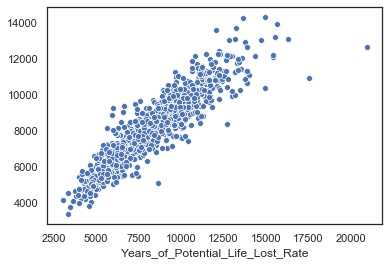

In [78]:
sns.scatterplot(y_test,pred)